<a href="https://colab.research.google.com/github/Shavva-Satya196/Google_Play_Application/blob/main/Google_App_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Analysis and Ratings Prediction for Apps on Google Play Store**

# **Importing Libraries**

In [ ]:
# Data
import re
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import missingno as msn

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Hide warnings
import warnings
warnings.filterwarnings('ignore')

**Setting theme for plots**

In [ ]:
sns.set_theme(style='darkgrid', palette='bright')
sns.set_context('paper')

## **Reading data**

Reading data
App : The name of the app

Category : The category of the app

Rating : The rating of the app in the Play Store

Reviews : The number of reviews of the app

Size : The size of the app

Install : The number of installs of the app

Type : The type of the app (Free/Paid)

Price : The price of the app (0 if it is Free)

Content Rating : The appropiate target audience of the app

Genres: The genre of the app

Last Updated : The date when the app was last updated

Current Ver : The current version of the app

Android Ver : The minimum Android version required to run the app

In [ ]:
data_path = '//content/googleplaystore.csv'

df = pd.read_csv(data_path)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


As we can see we have data of 10841 applications consisting of 13 attributes.

In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## **Data Cleaning**

Checking for missing values

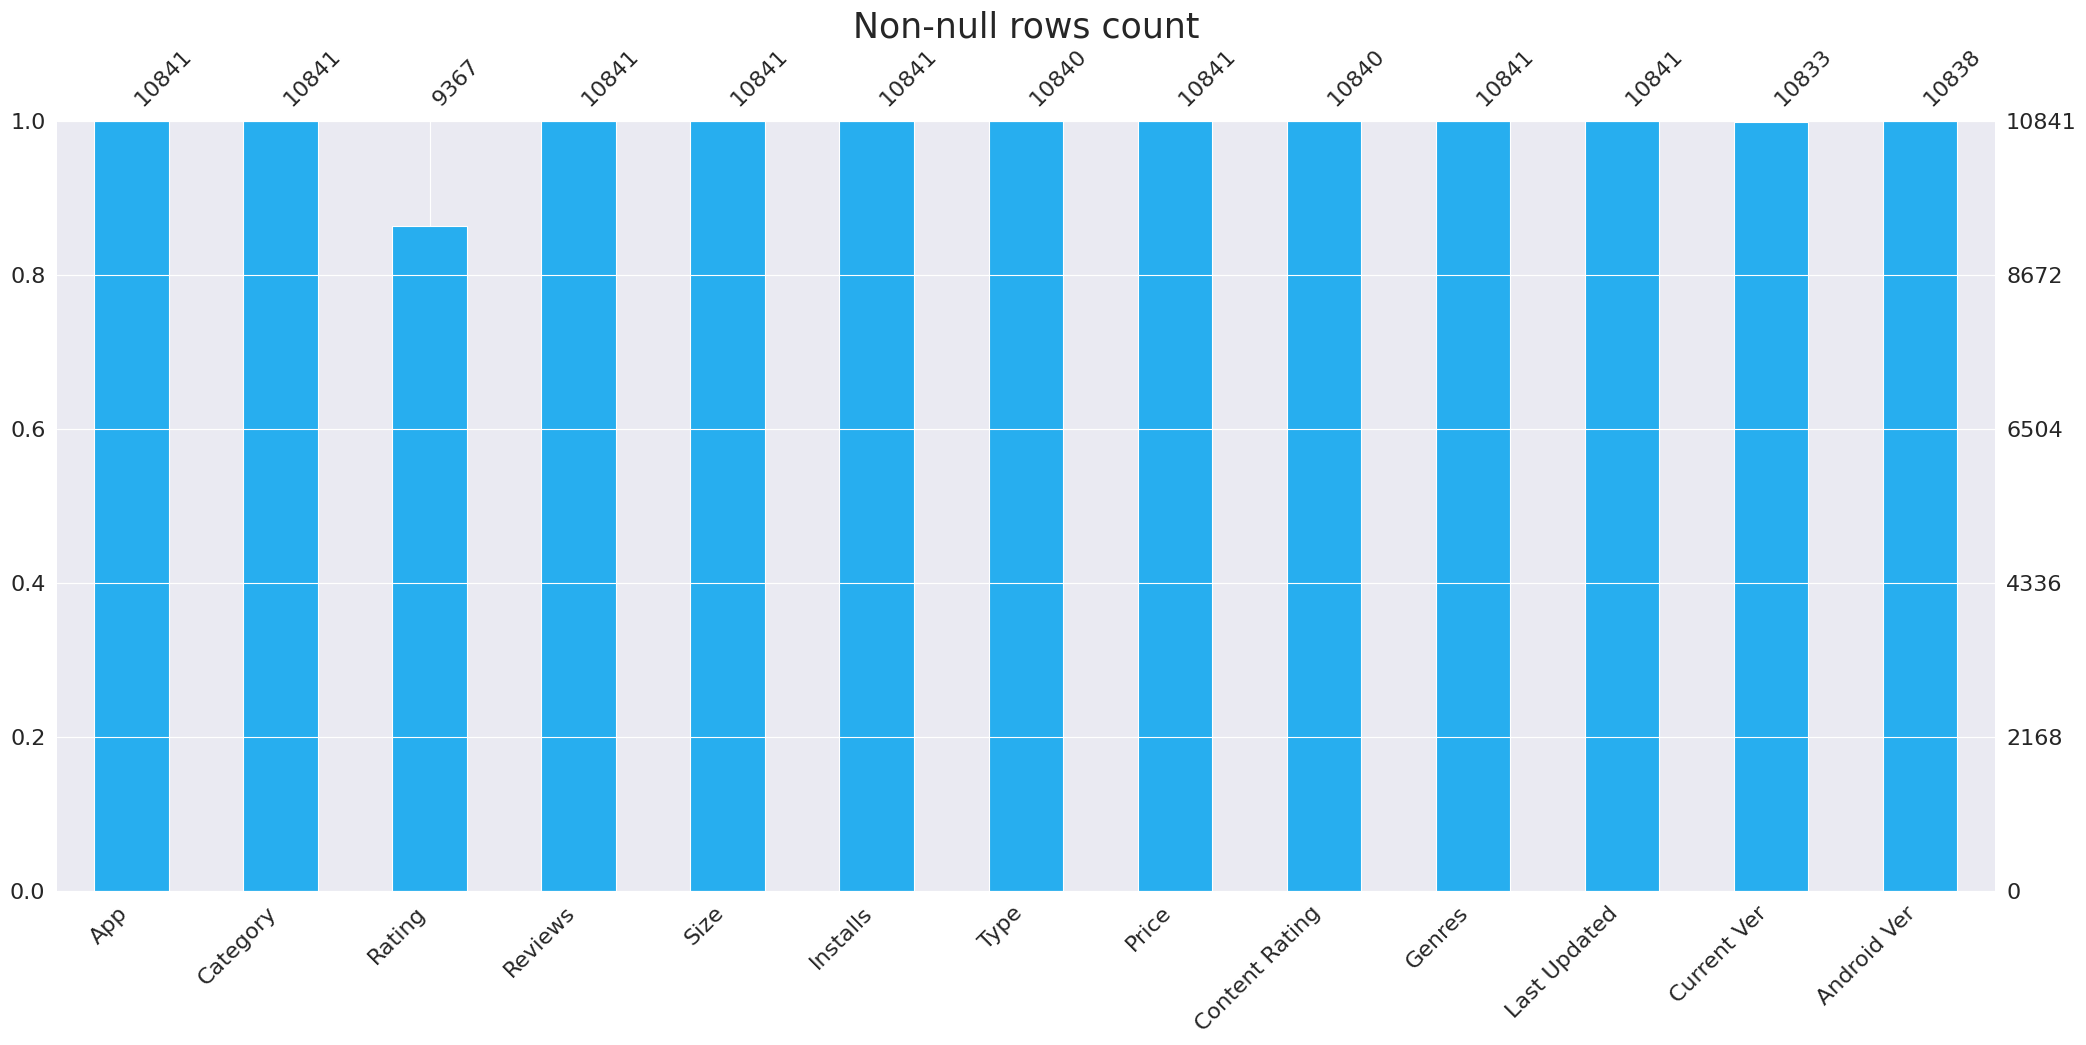

In [ ]:
fig = msn.bar(df=df, color='#27aeef')
fig.set_title('Non-null rows count', fontdict= {'fontsize': 25})
plt.show()

In [ ]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Its clear that we have missing values in Rating, Type, Content Rating, Current Ver and Android Ver.

**Handling missing values**

**We are dropping all the rows with null values**

In [ ]:
df.dropna(inplace=True)

**Duplicates**

Removing the duplicate rows

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(f'After removing the rows with Null values and the duplicate entries, {df.shape[0]} applications remained for further analysis.')

After removing the rows with Null values and the duplicate entries, 8886 applications remained for further analysis.


**Data Types**

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Preprocessing: Reviews

In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
df['Reviews'] = df['Reviews'].astype('int')

In [ ]:
df['Reviews'].dtype

dtype('int64')

**Preprocessing: Size**



*   The feature Size must be of floating type.
*   The suffix, which is a size unit, must be removed. \ Example: '19.2M' to 19.2


*   If size is given as 'Varies with device' we replace it with 0


*   The converted floating values of Size is represented in megabytes units.









In [ ]:
df['Size'][0]

'19M'

In [ ]:
def size_prep(size):
    size = size.strip()

    if 'M' in size: # Size in Megabytes
            size = size.replace('M', '')
            size = float(size)

    elif 'k' in size: # Size in Kilobytes
        size = size.replace('k', '')
        size = float(size)
        size /= 1024  # 1 Megabyte = 1024 Kilobytes

    elif size == 'Varies with device': # 'Varies with device' is represented by the value 0
        size = float(0)

    return size

In [ ]:
df['Size'] = df['Size'].map(size_prep)
df['Size'].dtype

dtype('float64')

**Preprocessing: Installs**


*   The feature Installs must be of integer type.
*   The characters ',' and '+' must be removed. \ Example: '10,000+' to 10000



In [ ]:
def installs_prep(installs):
    installs = installs.replace(',', '')
    installs = installs.replace('+', '').strip()

    return int(installs)

In [ ]:
df['Installs'] = df['Installs'].map(installs_prep)
df['Installs'].dtype

dtype('int64')

**Preprocessing: Price**


*   The feature Price must be of floating type.
*   The suffix  must be removed if Price is non-zero. Example: '$4.99' to 4.99



In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [ ]:
def price_prep(price):
    return float(0) if price == '0' else float(price[1:])

In [ ]:
df['Price'] = df['Price'].map(price_prep)
df['Price'].dtype

dtype('float64')

**Preprocessing: Last Updated**



*   Updating the Last Updated column's datatype from string to pandas datetime.
*   Extracting new columns Last Updated Year and Last Updated Month.
*   Changing the dtype of Last Updated Month to category.






In [ ]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

df['Last Updated Year'] = df['Last Updated'].apply(lambda d: int(d.strftime('%Y')))

df['Last Updated Month'] = df['Last Updated'].apply(lambda d: int(d.strftime('%m')))

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year,Last Updated Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


**Preprocessing: Android Ver**



*   The feature Android Ver must be of floating type.
*   All the values 'Varies with device' are replaced with 0.0
*   Only the minimum supported version is considered \ Example: '4.1 and up' to 4.1






In [ ]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [ ]:
def android_ver_prep(android_ver):
    android_ver = android_ver.strip()

    if android_ver == 'Varies with device': # When the version is 'Varies with device'
        android_ver = float(0)
    else:
        android_ver = float(android_ver[:3])

    return android_ver

In [ ]:
df['Android Ver'] = df['Android Ver'].map(android_ver_prep)
df['Android Ver'].dtype

dtype('float64')

**Data after handling types and formats**

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year,Last Updated Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,2018,6


## EDA and Visualization

**Heatmap**

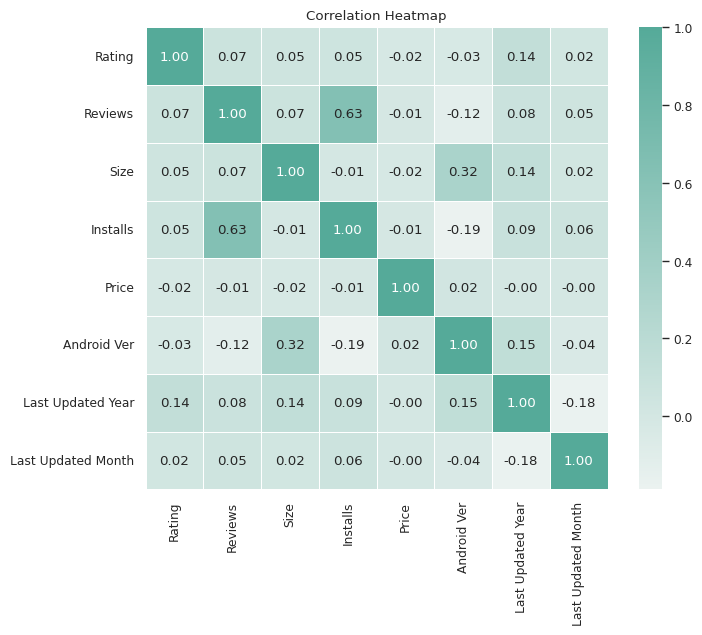

In [ ]:
fig, axes = plt.subplots(figsize=(8, 6))

sns.heatmap(data=df.select_dtypes(include='number').corr(),
            annot=True, linewidths=.5, fmt='.2f',
            cmap=sns.color_palette('light:#5A9', as_cmap=True),
            square=True)

plt.title('Correlation Heatmap')
plt.show()

We can infer that Installs is highly correlated with Reviews

**Box and Whisker Plot**

In [ ]:
count = 0
col_names = df.select_dtypes(include='number').columns

fig = make_subplots(
    rows=2,
    cols=4,
    subplot_titles=col_names,
)

for row in range(1, 3):
    for col in range(1, 5):
        box = go.Box(y=df[col_names[count]])
        fig.add_trace(box, row=row, col=col)
        count += 1

fig.update_layout(height=800, width=1000, title_text='Box and Whisker Plots', showlegend=False)
fig.show()

**Number of Apps per Category**

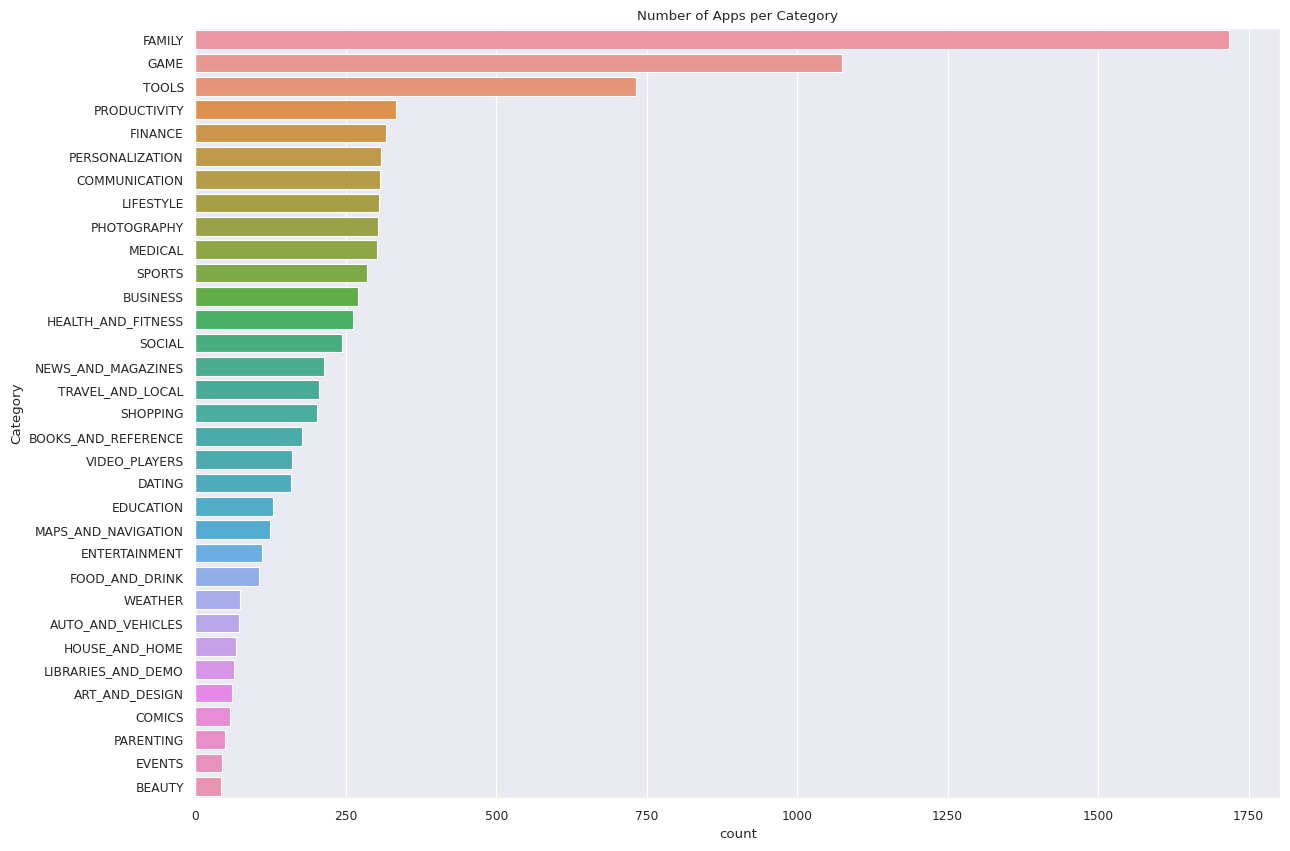

In [ ]:
plt.figure(figsize=(14, 10))

sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index)

plt.title('Number of Apps per Category')
plt.show()

As we can see, the maximum number of apps in the Google Play Store belongs to the Family, Game and Tools categories, with Family with the highest number of apps.

**Distribution of Ratings**

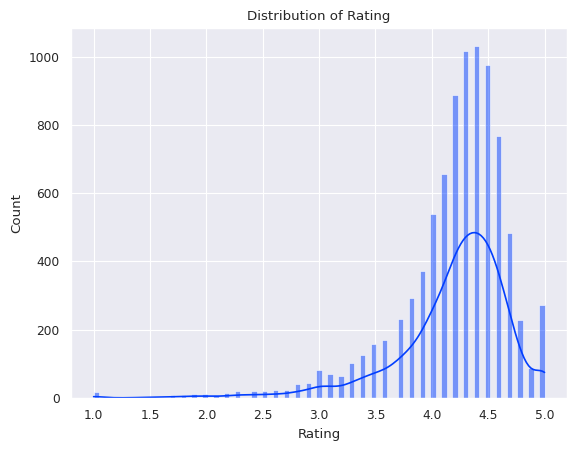

In [ ]:
sns.histplot(data=df, x='Rating', kde=True)

plt.title('Distribution of Rating')
plt.show()

The distributon of Rating is left-skewed and most of the apps have a rating between 4 and 5.

**Distribution of Reviews, Size, Installs and Price as per Rating**

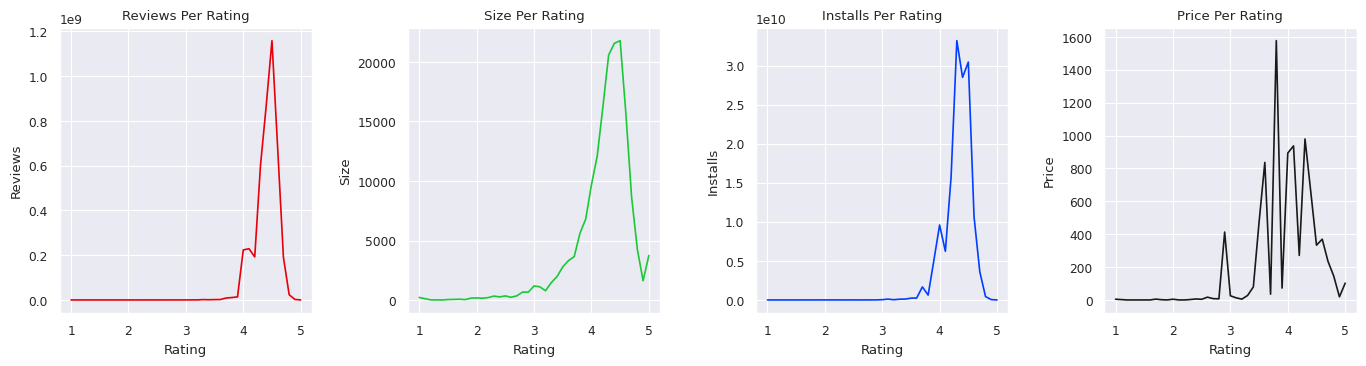

In [ ]:
groupby_rating_sum = df.drop(['Last Updated', 'Last Updated Year', 'Last Updated Month'], axis=1).groupby('Rating').sum().reset_index()

cols = ['Reviews', 'Size', 'Installs', 'Price']
color = ['r', 'g', 'b', 'k']
fig, axs = plt.subplots(1, 4, figsize=(14, 4))

for ax, col, color in zip(axs, cols, color):
    sns.lineplot(ax=ax, data=groupby_rating_sum, x='Rating', y=col, color=color)
    ax.set_xlabel('Rating')
    ax.set_ylabel(col)
    ax.set_title(f'{col} Per Rating')

fig.tight_layout(pad=2)
plt.show()

We may infer from the above graphs that the majority of apps with higher ratings in ranges of 4.0 - 5.0 have high numbers of reviews, size, and installs. While we can observe price fluctuations even at the range of high ratings, price does not necessarily have a direct correlation with rating.

**Rating vs Size as per App Type**

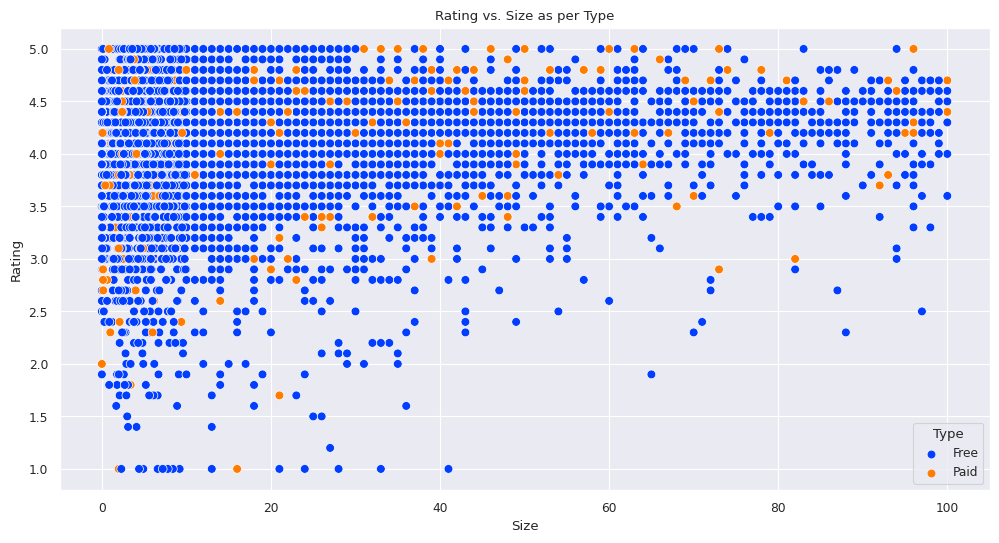

In [ ]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='Size', y='Rating', hue='Type', s=40)

plt.title('Rating vs. Size as per Type')
plt.show()

We can infer from this scatter plot that the bulk of the free apps are small in size and have excellent ratings. While we have a even mix of sizes and ratings for paid apps.

**Distribution of Reviews**

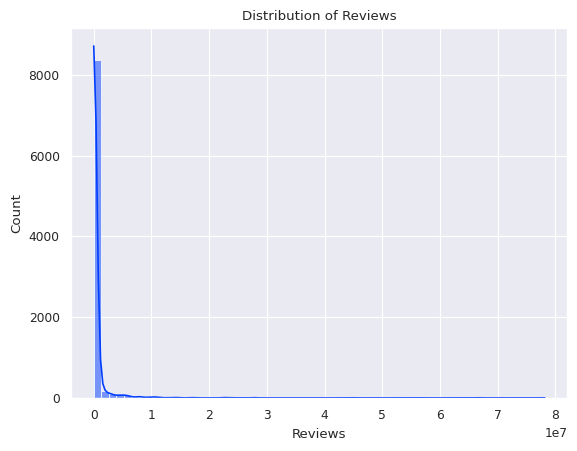

In [ ]:
sns.histplot(data=df, x='Reviews', bins=60, kde=True)

plt.title('Distribution of Reviews')
plt.show()

Top 20 Apps as per Reviews count

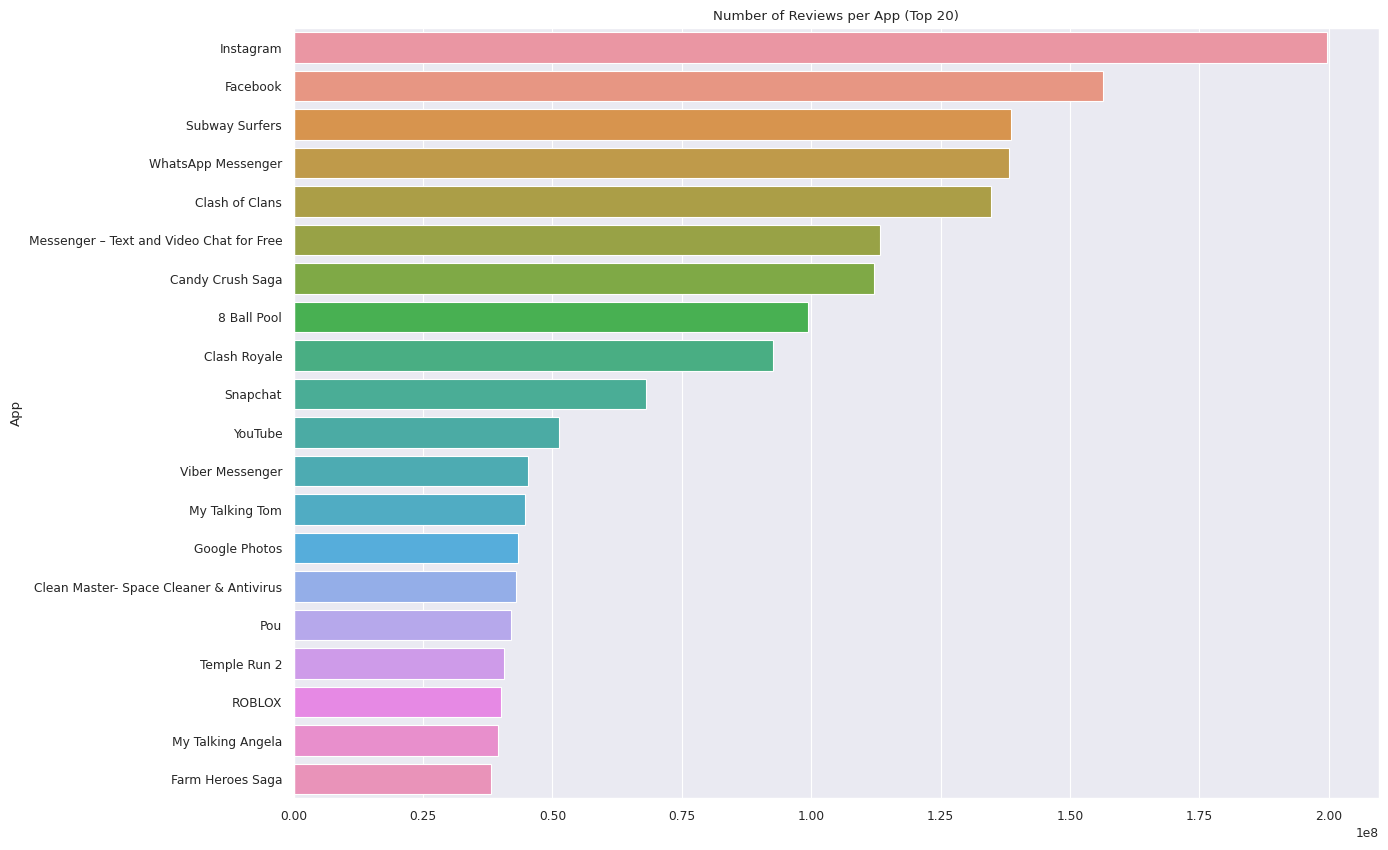

In [ ]:
total_reviews_per_app_desc = df.drop(['Last Updated', 'Last Updated Year', 'Last Updated Month'], axis=1).groupby(['App'])['Reviews'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 10))

sns.barplot(x=total_reviews_per_app_desc.head(20).values, y=total_reviews_per_app_desc.head(20).index)

plt.title('Number of Reviews per App (Top 20)')
plt.show()

Mostly the top 20 reviewed apps are games and social media apps with Instagram and Facebook at the top.

**Type (Paid or Free)**

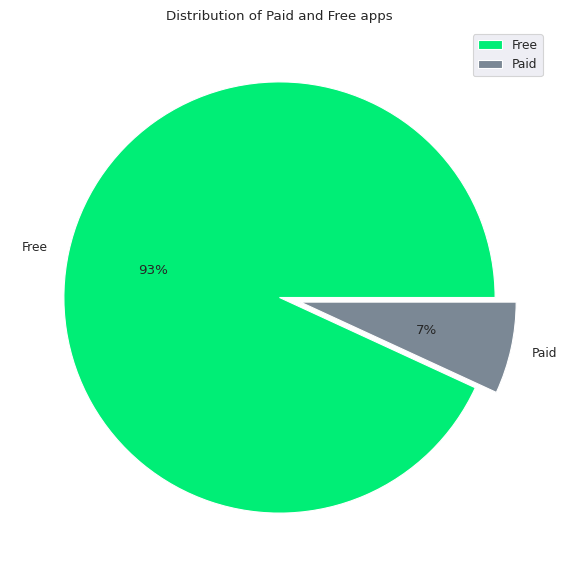

In [ ]:
colors = ["#00EE76","#7B8895"]
plt.figure(figsize=(7, 7))

plt.pie(x=df['Type'].value_counts(), labels=['Free', 'Paid'], colors=colors, autopct='%.0f%%', explode=(0, 0.1))

plt.title('Distribution of Paid and Free apps')
plt.legend()
plt.show()

**The Google Play Store has 93% free apps.**

**Content Rating**

In [ ]:
data = df['Content Rating'].value_counts().reset_index()

In [ ]:
fig = px.pie(values=data.iloc[:, 1],
             names=data.iloc[:, 0],
             title='Pie chart of App Content Rating',
             width=800, height=600)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Almost 80% of the apps are made for Everyone.

**Android Version**

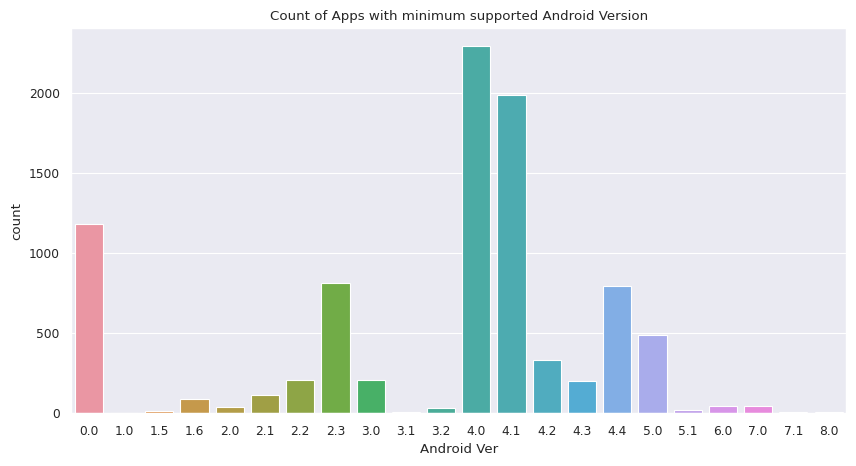

In [ ]:
plt.figure(figsize=(10, 5))

sns.countplot(data=df, x='Android Ver')

plt.title('Count of Apps with minimum supported Android Version')
plt.show()

**It can be seen that majority of the apps support Android Version 4.0 and above**

**Distribution of App Update over the Year**

In [ ]:
groupby_year_free_count = df[df['Type'] == 'Free'].drop(['Last Updated'], axis=1).groupby('Last Updated Year')['Last Updated Year'].count()
groupby_year_paid_count = df[df['Type'] == 'Paid'].drop(['Last Updated'], axis=1).groupby('Last Updated Year')['Last Updated Year'].count()

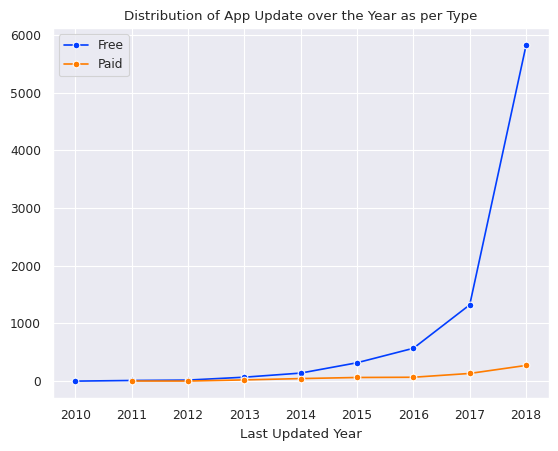

In [ ]:
sns.lineplot(x=groupby_year_free_count.index,
             y=groupby_year_free_count.values,
             marker='o', label='Free')

sns.lineplot(x=groupby_year_paid_count.index,
             y=groupby_year_paid_count.values,
             marker='o', label='Paid')

plt.title('Distribution of App Update over the Year as per Type')
plt.legend()
plt.show()

As seen in the above plot, before 2011, there were no paid apps. However, as time has passed, the number of free apps has increased more than paid apps. By comparing the applications updated from 2011 to 2018, free apps have grown exponentially, whereas there is no significant increase in paid apps. We may infer that the majority of users choose free apps.

**Distribution of App Update over the Month**

In [ ]:
groupby_month_free_count = df[df['Type'] == 'Free'].drop(['Last Updated'], axis=1).groupby('Last Updated Month')['Last Updated Month'].count()
groupby_month_paid_count = df[df['Type'] == 'Paid'].drop(['Last Updated'], axis=1).groupby('Last Updated Month')['Last Updated Month'].count()

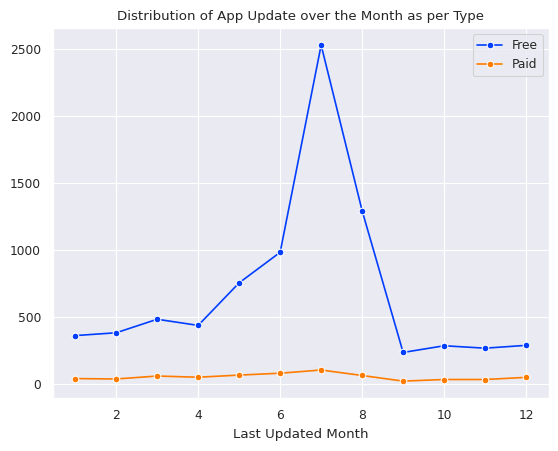

In [ ]:
sns.lineplot(x=groupby_month_free_count.index,
             y=groupby_month_free_count.values,
             marker='o', label='Free')

sns.lineplot(x=groupby_month_paid_count.index,
             y=groupby_month_paid_count.values,
             marker='o', label='Paid')

plt.title('Distribution of App Update over the Month as per Type')
plt.legend()
plt.show()

Majority of the apps are updated around June, July and August.

# Feature Pruning

We decide to prune the following features:


*   App : App names are of no value for the model
*   Genres : The informations it stores is same as the feature Category


*   Last Updated : Since feature extraction is already carried out to make year and month features
*   Current Ver : Current Version of an app doesn't hold significant value.





In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year,Last Updated Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,2018,6


In [ ]:
pruned_features = ['App', 'Genres', 'Last Updated', 'Current Ver']

## Data Splitting for Modeling

We split the dataset into 80% train and 20% test.

In [ ]:
target = 'Rating'

In [ ]:
X = df.copy().drop(pruned_features+[target], axis=1)
y = df.copy()[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Label Encoding

In [ ]:
le_dict = defaultdict()

In [ ]:
features_to_encode = X_train.select_dtypes(include=['category', 'object']).columns

for col in features_to_encode:
    le = LabelEncoder()

    X_train[col] = le.fit_transform(X_train[col]) # Fitting and tranforming the Train data
    X_train[col] = X_train[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    X_test[col] = le.transform(X_test[col]) # Only transforming the test data
    X_test[col] = X_test[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    le_dict[col] = le # Saving the label encoder for individual features

# Standardization

In [ ]:
# Converting and adding "Last Updated Month" to categorical features
categorical_features = features_to_encode + ['Last Updated Month']
X_train['Last Updated Month'] = X_train['Last Updated Month'].astype('category')
X_test['Last Updated Month'] = X_test['Last Updated Month'].astype('category')

# Listing numeric features to scale
numeric_features = X_train.select_dtypes(exclude=['category', 'object']).columns

In [ ]:
numeric_features

Index(['Reviews', 'Size', 'Installs', 'Price', 'Android Ver',
       'Last Updated Year'],
      dtype='object')

In [ ]:
scaler = StandardScaler()

# Fitting and transforming the Training data
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# X_train = scaler.fit_transform(X_train)

# Only transforming the Test data
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
# X_test = scaler.transform(X_test)

## Modeling

**Regression**

**Creating dataframe for metrics**

In [ ]:
models = ['Linear', 'KNN', 'Random Forest']
datasets = ['train', 'test']
metrics = ['RMSE', 'MAE', 'R2']

multi_index = pd.MultiIndex.from_product([models, datasets, metrics],
                                         names=['model', 'dataset', 'metric'])

df_metrics_reg = pd.DataFrame(index=multi_index,
                          columns=['value'])

In [ ]:
df_metrics_reg

value
model         dataset metric      
Linear        train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
KNN           train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
Random Forest train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN

**Linear Regressor**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
df_metrics_reg.loc['Linear', 'train', 'R2'] = lr.score(X_train, y_train)
df_metrics_reg.loc['Linear', 'test', 'R2'] = lr.score(X_test, y_test)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

df_metrics_reg.loc['Linear', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Linear', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Linear', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Linear', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

**KNeighbors Regressor**

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
df_metrics_reg.loc['KNN', 'train', 'R2'] = knn.score(X_train, y_train)
df_metrics_reg.loc['KNN', 'test', 'R2'] = knn.score(X_test, y_test)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

df_metrics_reg.loc['KNN', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['KNN', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['KNN', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['KNN', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

**Random Forest Regressor**

In [ ]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
df_metrics_reg.loc['Random Forest', 'train', 'R2'] = rf.score(X_train, y_train)
df_metrics_reg.loc['Random Forest', 'test', 'R2'] = rf.score(X_test, y_test)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

df_metrics_reg.loc['Random Forest', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Random Forest', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Random Forest', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Random Forest', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

**Regression Evaluation**

In [ ]:
# Rounding the values

df_metrics_reg['value'] = df_metrics_reg['value'].apply(lambda v: round(v, ndigits=3))
df_metrics_reg

value
model         dataset metric       
Linear        train   RMSE    0.513
                      MAE     0.359
                      R2      0.032
              test    RMSE    0.515
                      MAE     0.357
                      R2      0.037
KNN           train   RMSE    0.438
                      MAE     0.304
                      R2      0.295
              test    RMSE    0.523
                      MAE     0.362
                      R2      0.008
Random Forest train   RMSE    0.500
                      MAE     0.348
                      R2      0.081
              test    RMSE    0.503
                      MAE     0.351
                      R2      0.079

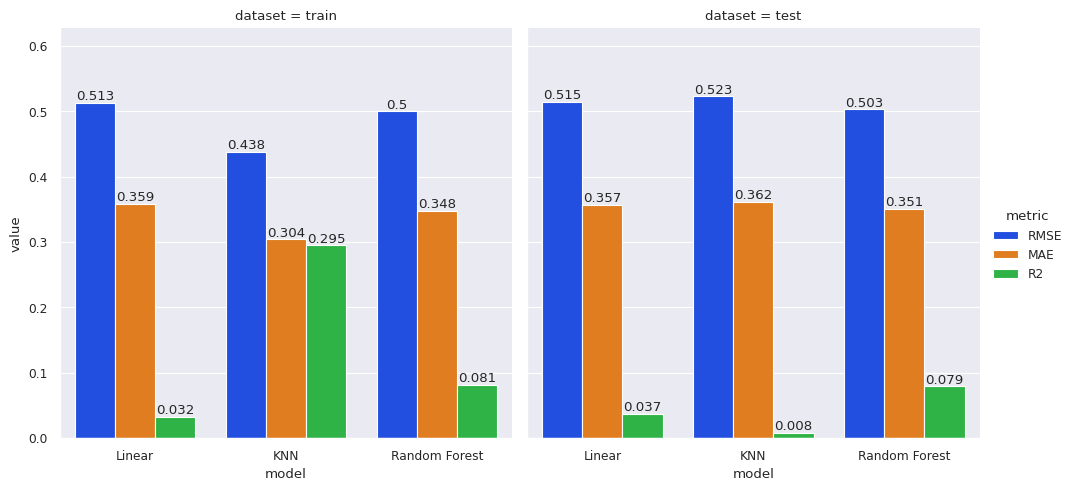

In [ ]:
data = df_metrics_reg.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='value', hue='metric')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()

The Regression predictions don't hold up very well!

**Classification**

Let's frame it as a classification problem statement.

Converting the Rating from continuous to discrete

In [ ]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

Creating dataframe for metrics

In [ ]:
models = ['Logistic Regression', 'KNN', 'Random Forest']
datasets = ['train', 'test']

multi_index = pd.MultiIndex.from_product([models, datasets],
                                         names=['model', 'dataset'])

df_metrics_clf = pd.DataFrame(index=multi_index,
                          columns=['accuracy %'])

In [ ]:
df_metrics_clf

accuracy %
model               dataset           
Logistic Regression train          NaN
                    test           NaN
KNN                 train          NaN
                    test           NaN
Random Forest       train          NaN
                    test           NaN

**Logistic Regression Classifier**

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train_int)
df_metrics_clf.loc['Logistic Regression', 'train'] = lr_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Logistic Regression', 'test'] = lr_clf.score(X_test, y_test_int)

**KNeighbors Classifier**

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_int)
df_metrics_clf.loc['KNN', 'train'] = knn_clf.score(X_train, y_train_int)
df_metrics_clf.loc['KNN', 'test'] = knn_clf.score(X_test, y_test_int)

**Random Forest Classifier**

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train_int)
df_metrics_clf.loc['Random Forest', 'train'] = rf_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Random Forest', 'test'] = rf_clf.score(X_test, y_test_int)

**Classification Evaluation**

In [ ]:
# Rounding and coverting the accuracies to percentages
df_metrics_clf['accuracy %'] = df_metrics_clf['accuracy %'].apply(lambda v: round(v*100, ndigits=2))
df_metrics_clf

accuracy %
model               dataset            
Logistic Regression train         74.94
                    test          75.14
KNN                 train         78.39
                    test          71.09
Random Forest       train         99.99
                    test          76.32

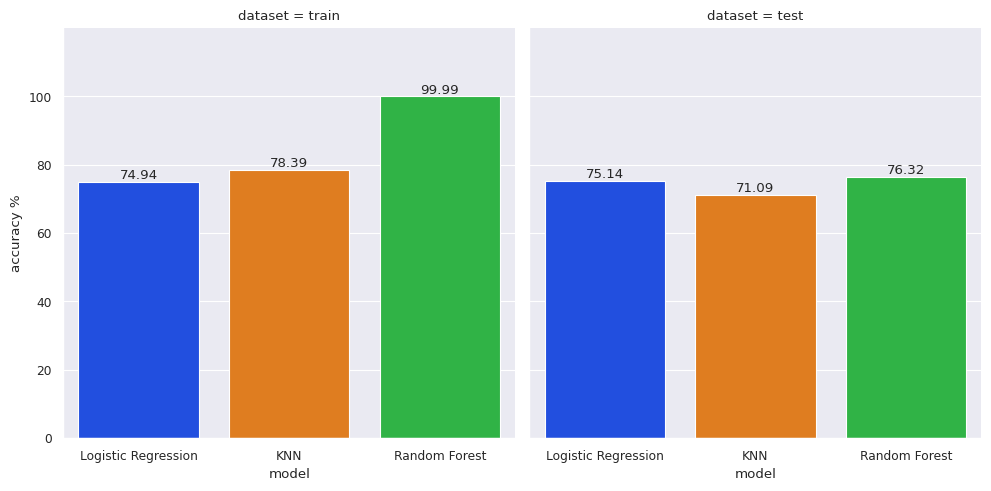

In [ ]:
data = df_metrics_clf.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='accuracy %')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()

# Conclusion




*   In conclusion, the dataset from Google Play Store apps has been explored and analyzed using various data visualization techniques with the help of Matplotlib, Seaborn and Plotly libraries.
*   The preliminary analysis, visualization methods and EDA provided insights into the data and helped in understanding the underlying patterns and relationships among the variables.


*   The analysis of the Google Play Store dataset has shown that there is a weak correlation between the rating and other app attributes such as size, installs, reviews, and price. We found that there was a moderate positive correlation between the number of installs and the rating, suggesting that higher-rated apps tend to have more installs.
*   We also observed that free apps have higher ratings than paid apps, and that app size does not seem to have a significant impact on rating.



